In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

# Exercise 1: CSV

In [4]:
# Read in CSV
surv = pd.read_csv('pythondevsurvey2017_raw_data.csv')

Text(0.5, 1.0, 'What do you use Python for the most?\n(top 10 responses, excluding non-Python users)')

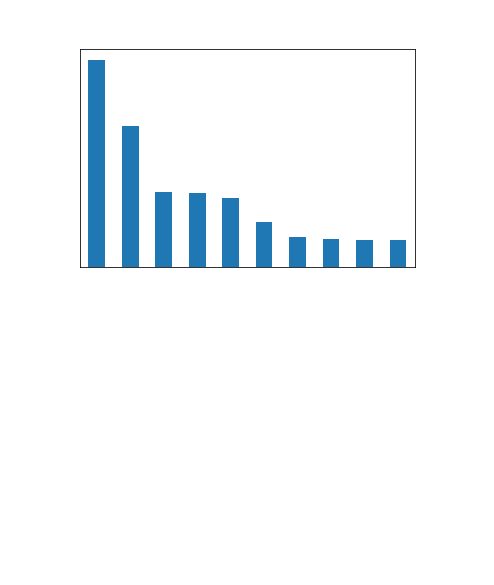

In [5]:
# What do you use Python for the most? (Single answer) Chart
responses = surv['What do you use Python for the most?'].value_counts()
responses = (responses/responses.sum())*100
responses.head(10).plot.bar()
plt.ylabel('% of responses')
plt.title('What do you use Python for the most?\n(top 10 responses, excluding non-Python users)',size = 20,color = 'white')

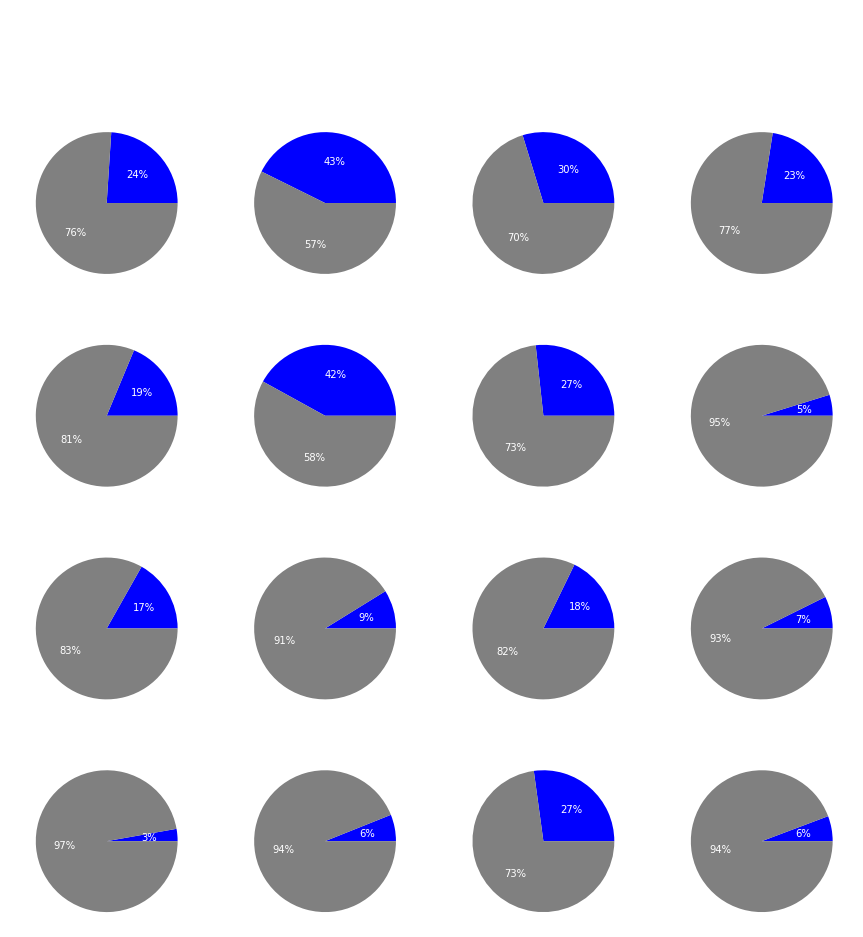

In [6]:
# What do you use Python for (multiple answers)?
fig, [[ax1, ax2, ax3, ax4],
      [ax5, ax6, ax7, ax8],
      [ax9, ax10, ax11, ax12],
      [ax13, ax14, ax15, ax16]]= plt.subplots(4,4)

all_axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, ax15, ax16]

def plot_response(col, sbplt):
    pie_data = [len(col.dropna()) , len(list(col)) - len(col.dropna())]
    sbplt.pie(pie_data, labels = ['Yes','No'] , autopct='%1.f%%', colors = ['blue','grey'])
    title = col.name[0:-29]
    if len(title) > 30:
        title = title[0:30] + '...'
    sbplt.set_title(title)

i = 25

for ax in all_axes:
    plot_response( surv[surv.columns[i]] , ax)
    i+=1

fig.suptitle('What do you use Python for?\n(% Responses from all users)', size = 30)
fig.set_size_inches(15,15, forward=True)

# Exercise 2: Slicing Arrays

In [7]:
a = [[1, 2, 3, 4, 5], [6, 7, 8, 9, 10], [11, 12, 13, 14, 15], [16, 17, 18, 19, 20]]
nd_a = np.array(a)

# Print whole array using slice
nd_a[::,::]
# or just nd_a

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20]])

In [8]:
# Print 12
nd_a[2,1]

12

In [9]:
# Reverse the array
nd_a[ 3: :-1 , 4: :-1 ]

array([[20, 19, 18, 17, 16],
       [15, 14, 13, 12, 11],
       [10,  9,  8,  7,  6],
       [ 5,  4,  3,  2,  1]])

In [10]:
# Reverse only one row in the array
row = 2
nd_row_flipped = nd_a.copy()
nd_row_flipped[row] = nd_row_flipped[row, : : -1]
nd_row_flipped

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [15, 14, 13, 12, 11],
       [16, 17, 18, 19, 20]])

In [11]:
# Slice the first three columns in the array
nd_a[:,0:3]

array([[ 1,  2,  3],
       [ 6,  7,  8],
       [11, 12, 13],
       [16, 17, 18]])

In [12]:
# Slice the last three columns and reverse them
nd_a[:,-3::-1]

array([[ 3,  2,  1],
       [ 8,  7,  6],
       [13, 12, 11],
       [18, 17, 16]])

In [13]:
# Slice the last two rows and print them
print(nd_a[-2:])

[[11 12 13 14 15]
 [16 17 18 19 20]]


In [14]:
# Slice the last integers in a row
nd_a[ : , -1]

array([ 5, 10, 15, 20])

In [15]:
# Slice the rows and columns
for r in range(len(nd_a)):
    print('Row',r,':',nd_a[r])
    
for c in range(len(nd_a[0])):
    print('Column',c,nd_a[ : , c])

Row 0 : [1 2 3 4 5]
Row 1 : [ 6  7  8  9 10]
Row 2 : [11 12 13 14 15]
Row 3 : [16 17 18 19 20]
Column 0 [ 1  6 11 16]
Column 1 [ 2  7 12 17]
Column 2 [ 3  8 13 18]
Column 3 [ 4  9 14 19]
Column 4 [ 5 10 15 20]


# Exercise 3: When is it best to bike alone?

In [16]:
!curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD
bikes = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100 1247k    0 1247k    0     0   522k      0 --:--:--  0:00:02 --:--:--  522k
100 2734k    0 2734k    0     0   818k      0 --:--:--  0:00:03 --:--:--  817k
100 4248k    0 4248k    0     0   990k      0 --:--:--  0:00:04 --:--:--  990k


In [17]:
# Data format: every hour, starting 2012-10-03-00:00:00 to 2020-09-30 23:00:00
# Tuples = 136,334 , columns = 3
# Rename columns
bikes.columns= ['Total', 'East', 'West']
bikes.head()

,Total,East,West
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


Text(0.5, 1, 'Consistent Commuting Peaks:\nMon-Fri 7-9 AM and 4-6 PM\n(Moderate weekend peaks from 10-4 PM)')

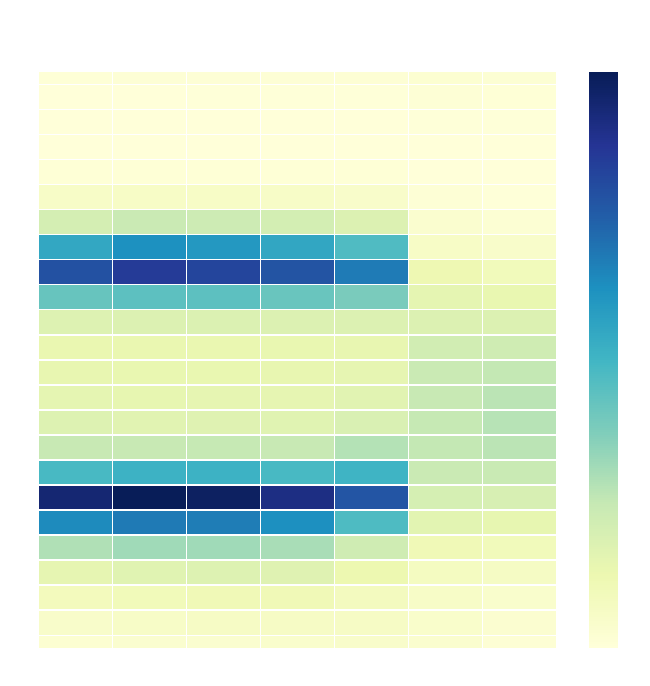

In [18]:
# When are the busiest hours per week in Total?
hrs_per_week = bikes.groupby([bikes.index.weekday, bikes.index.hour]).mean()
hrs_per_week.index.names = ['Weekday','Hour']

hrs_per_week_total = hrs_per_week.Total.unstack(level = 'Weekday')

plt.axes([ 0 , 0 , 1.5 , 2 ])
ax = sns.heatmap(hrs_per_week_total,cmap="YlGnBu",linewidths = .5)
ax.set_xticklabels(['M','T','W','T','F','S','S'])
ax.set_title('''Consistent Commuting Peaks:
Mon-Fri 7-9 AM and 4-6 PM
(Moderate weekend peaks from 10-4 PM)''', fontsize = 20)


Text(0.5, 1, 'Which sidewalk is preferable?\nMon-Fri AM = West  |  Mon-Fri PM = East\n(Negligible difference all other times)')

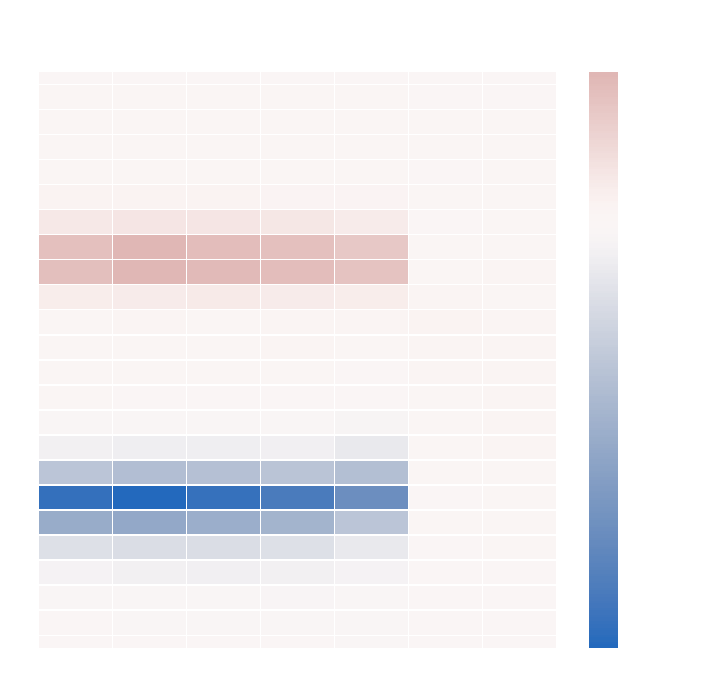

In [19]:
# Where will you be more comfortable (alone) riding during the week (East or West?)

# Define column to determine which sidewalk is less crowded at every hour of every weekday
hrs_per_week['East_minus_West'] = hrs_per_week.East - hrs_per_week.West
hrs_per_week_EvW = hrs_per_week.East_minus_West.unstack(level = 'Weekday')

plt.axes([ 0 , 0 , 1.5 , 2 ])
ax = sns.heatmap(hrs_per_week_EvW, cmap="vlag", center = 0, linewidths = .5)

cbar = ax.collections[0].colorbar
cbar.set_ticks([60, 0, -240])
cbar.set_ticklabels(['West preferred', 'No difference', 'East preferred'])

ax.set_xticklabels(['M','T','W','T','F','S','S'])
ax.set_title('''Which sidewalk is preferable?
Mon-Fri AM = West  |  Mon-Fri PM = East
(Negligible difference all other times)''', fontsize = 20)

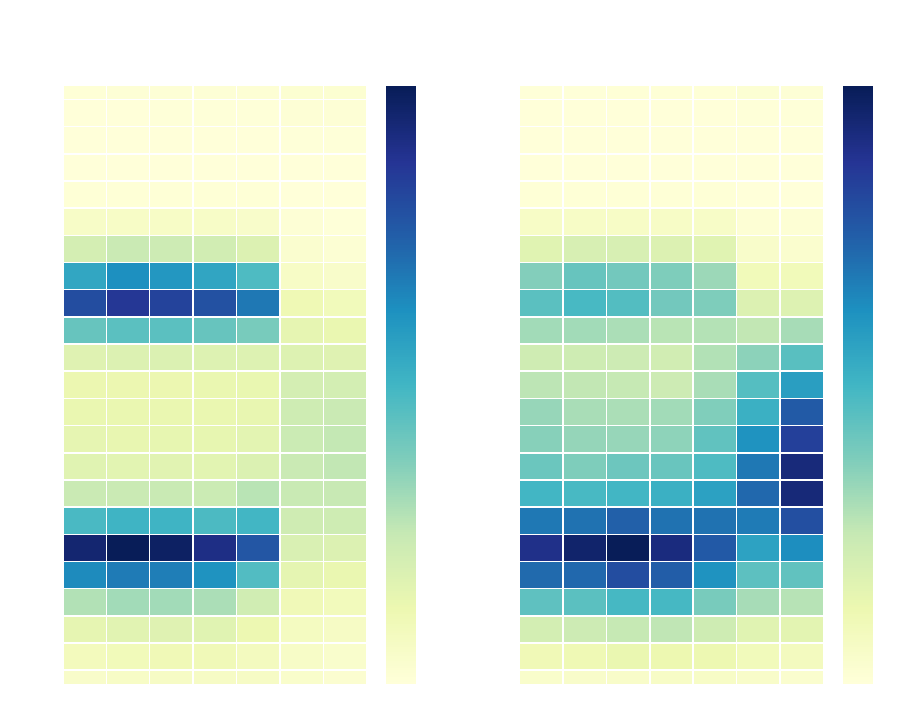

In [20]:
# Coronavirus pandemic:
# Did the daily riding hours change?
bikes_pre_COVID = bikes[bikes.index < '2020-03-01 00:00:00']
bikes_COVID = bikes[bikes.index > '2020-03-01 00:00:00']

def hrs_per_week_plot(data, axs):
    hrs_per_week = data.groupby([data.index.weekday, data.index.hour]).mean()
    hrs_per_week.index.names = ['Weekday','Hour']
    hrs_per_week_total = hrs_per_week.Total.unstack(level = 'Weekday')
    sns.heatmap(hrs_per_week_total, ax = axs, cmap="YlGnBu",linewidths = .5)
    ax.set_xticklabels(['M','T','W','T','F','S','S'])

fig, [ax1, ax2] = plt.subplots(1,2)
hrs_per_week_plot(bikes_pre_COVID, ax1)
hrs_per_week_plot(bikes_COVID, ax2)

fig.suptitle('Weekly Biking Pattterns: Pre-COVID vs. During COVID', size = 30)
ax1.set_title('Pre-Covid (2012 - Feb 2020)\nMajority activity during weekday commuting hours.', size = 16)
ax2.set_title('During COVID (Mar 2020 - Present)\nActivity shifts to PM and weekends.', size = 16)
fig.set_size_inches(15,11, forward=True)

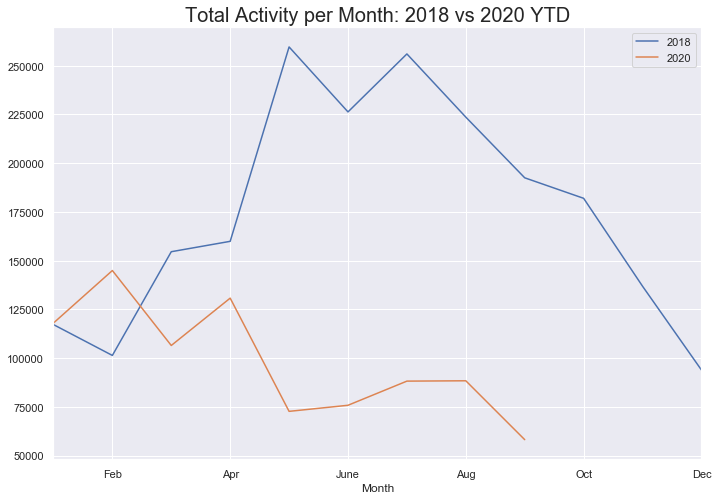

In [56]:
# Coronavirus pandemic:
# How many riders are passing through the bridge comparing 2018 and 2020?
bikes_18 = bikes[bikes.index.year == 2018]
bikes_20 = bikes[bikes.index.year == 2020]

def group_by_month(data):
    return data.groupby(data.index.month).sum()

bikes_18_month = group_by_month(bikes_18)
bikes_20_month = group_by_month(bikes_20)

fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 1.5, 1.5])

bikes_18_month.Total.plot()
bikes_20_month.Total.plot()
plt.xlabel('Month')
plt.title('Total Activity per Month: 2018 vs 2020 YTD', size = 20)
ax.set_xticklabels(['Jan','Feb','Apr','June','Aug','Oct','Dec'])
ax.legend(['2018','2020'])

# Exercise 4: Let's get rich!

In [22]:
url = 'https://raw.githubusercontent.com/vfp1/bts-dsf-2020/main/data/appl_1980_2014.csv'
apple = pd.read_csv(url, index_col='Date', parse_dates=True, delimiter = ',')
apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


Text(2012-03-30, 750, '10 shares =\n $5610')

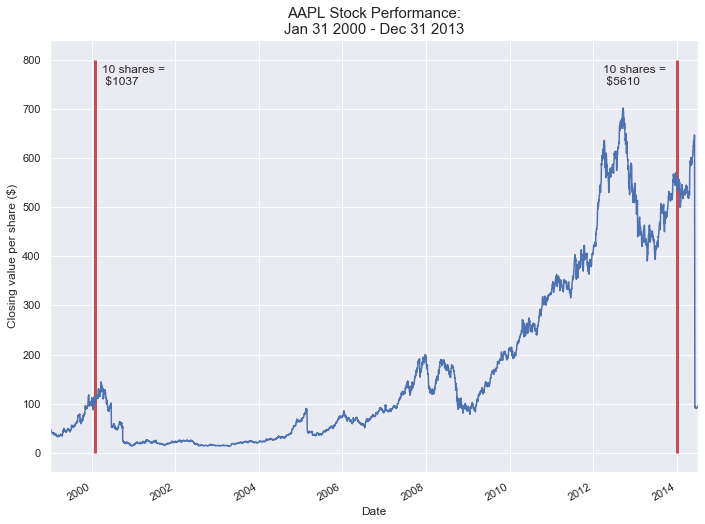

In [57]:
# How much money will you have now if you bought 10 stocks for Apple 
# at the end of January 2000 and you sold it at the end of 2013
sns.set()
jan_31_2000_close = int(apple[apple.index == '2000-01-31'].Close*10)
dec_31_2013_close = int(apple[apple.index == '2013-12-31'].Close*10)

fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 1.5, 1.5])

apple[apple.index.year >= 1999].Close.plot()
plt.ylabel('Closing value per share ($)')
plt.vlines('2000-01-31',ymin = 0, ymax= 800, color = 'r', linewidth = 3)
plt.vlines('2013-12-31',ymin = 0, ymax= 800, color = 'r', linewidth = 3)
plt.title(('AAPL Stock Performance:\nJan 31 2000 - Dec 31 2013'), size = 15)
plt.text('2000-03-30',750,'10 shares =\n $'+str(jan_31_2000_close))
plt.text('2012-03-30',750,'10 shares =\n $'+str(dec_31_2013_close))

Text(DatetimeIndex(['2000-09-29'], dtype='datetime64[ns]', name='Date', freq=None), 1855410200, '1.86B on 29-Sep-2000')

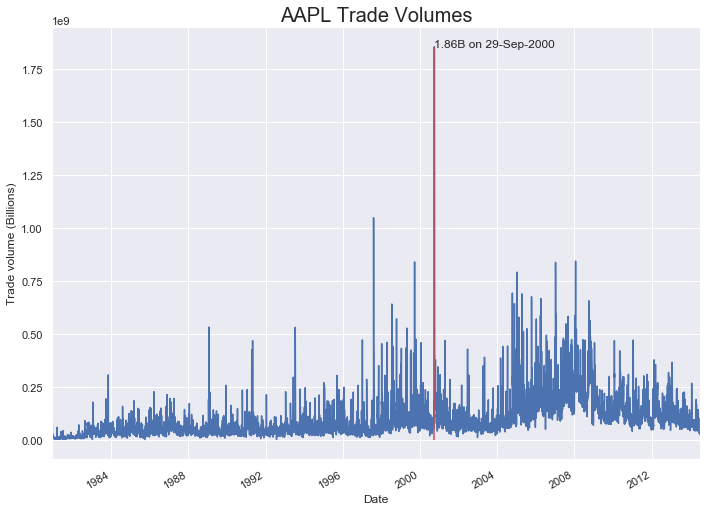

In [58]:
# When was the peak maximum of volume of trades done?
maxvol = apple.Volume.max()
maxvoldate = apple[apple.Volume == maxvol].index
maxvoldate2 = str(maxvoldate.strftime("%d-%b-%Y"))[8:19]

fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 1.5, 1.5])
apple.Volume.plot()
plt.ylabel('Trade volume (Billions)')
plt.title('AAPL Trade Volumes', size = 20)
plt.vlines(maxvoldate, ymin = 0, ymax = maxvol, color = 'r', zorder = 20)
plt.text(maxvoldate, maxvol, (str(round(maxvol/1000000000,2))+'B on '+maxvoldate2))

Text(DatetimeIndex(['1982-06-30'], dtype='datetime64[ns]', name='Date', freq=None), 200, 'Lowest monthly close ocurred in Jun-1982 at $12.75')

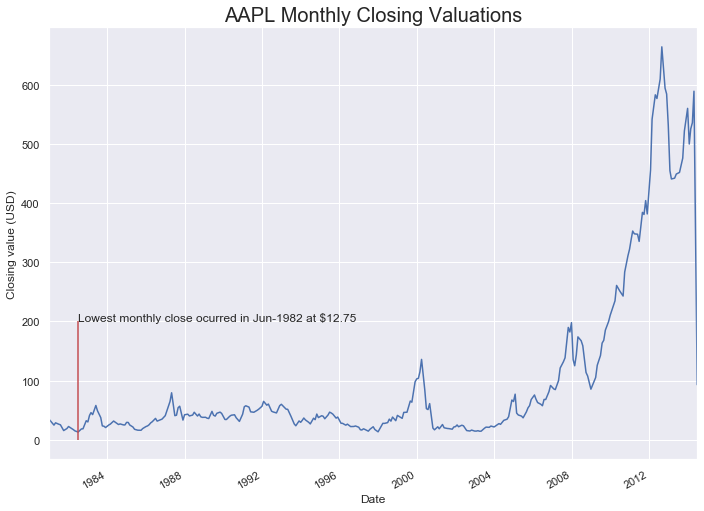

In [64]:
# When was the month with the lowest close?
apple_month_end = apple[apple.index.is_month_end == True]
month_minclose = apple_month_end.Close.min()
month_minclosedate = apple_month_end[apple_month_end.Close == month_minclose].index
month_minclosedate2 = str(month_minclosedate.strftime("%d-%b-%Y"))[11:19]

fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 1.5, 1.5])
apple_month_end.Close.plot()
plt.ylabel('Closing value (USD)')
plt.title('AAPL Monthly Closing Valuations', size = 20)
plt.vlines(month_minclosedate, ymin = 0, ymax = 200, color = 'r', zorder = 20)
plt.text(month_minclosedate, 200, ('Lowest monthly close ocurred in '+ month_minclosedate2+ ' at $' + str(month_minclose)))

Text(DatetimeIndex(['1982-07-08'], dtype='datetime64[ns]', name='Date', freq=None), 200, 'Lowest daily close ocurred on 08-Jul-1982 at $11.0')

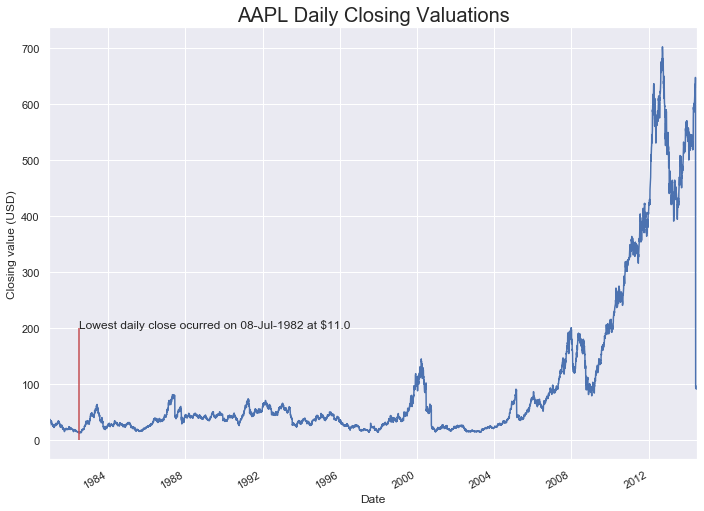

In [61]:
# Lowest close day of the whole dataset
minclose = apple.Close.min()
minclosedate = apple[apple.Close == minclose].index
minclosedate2 = str(minclosedate.strftime("%d-%b-%Y"))[8:19]

fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 1.5, 1.5])
apple.Close.plot()
plt.ylabel('Closing value (USD)')
plt.title('AAPL Daily Closing Valuations', size = 20)
plt.vlines(minclosedate, ymin = 0, ymax = 200, color = 'r', zorder = 20)
plt.text(minclosedate, 200, ('Lowest daily close ocurred on '+ minclosedate2 + ' at $' + str(minclose)))